# Importing and analyzing data 

Import important libraries.

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

We will take data from our github repositories, which were downloaded from kaggle.

In [ ]:
url = 'https://raw.githubusercontent.com/maihadat/Disease-Prediction/topic/change_data_and-add_test_decision_tree/Data_sets/dataset.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Severity,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,...,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell,Disease
0,0,13,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,2,10,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,3,8,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,4,13,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,5404,29,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
5405,5405,31,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis
5406,5406,43,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,AIDS
5407,5407,16,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox


We take the attributes of the dataset.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Severity', 'itching', ' skin_rash',
       ' continuous_sneezing', ' shivering', ' stomach_pain', ' acidity',
       ' vomiting', ' indigestion',
       ...
       ' receiving_unsterile_injections', ' coma', ' sinus_pressure',
       ' palpitations', ' stomach_bleeding', ' runny_nose', ' congestion',
       ' blood_in_sputum', ' loss_of_smell', 'Disease'],
      dtype='object', length=144)

A sample case of datapoint


In [ ]:
df.iloc[0].to_numpy()

array([0, 13, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 'Fungal infection'], dtype=object)

Drop redundant column.


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

The number of diseases.

In [ ]:
len(df['Disease'].unique())

42

Symptoms in the datasets.

In [ ]:
sorted(df.columns.tolist()[:-1])

[' abdominal_pain',
 ' abnormal_menstruation',
 ' acidity',
 ' acute_liver_failure',
 ' altered_sensorium',
 ' anxiety',
 ' back_pain',
 ' belly_pain',
 ' blackheads',
 ' bladder_discomfort',
 ' blister',
 ' blood_in_sputum',
 ' bloody_stool',
 ' blurred_and_distorted_vision',
 ' breathlessness',
 ' brittle_nails',
 ' bruising',
 ' burning_micturition',
 ' chest_pain',
 ' chills',
 ' cold_hands_and_feets',
 ' coma',
 ' congestion',
 ' constipation',
 ' continuous_feel_of_urine',
 ' continuous_sneezing',
 ' cough',
 ' cramps',
 ' dark_urine',
 ' dehydration',
 ' depression',
 ' diarrhoea',
 ' dischromic _patches',
 ' distention_of_abdomen',
 ' dizziness',
 ' drying_and_tingling_lips',
 ' enlarged_thyroid',
 ' excessive_hunger',
 ' extra_marital_contacts',
 ' family_history',
 ' fast_heart_rate',
 ' fatigue',
 ' fluid_overload',
 ' foul_smell_of urine',
 ' headache',
 ' high_fever',
 ' hip_joint_pain',
 ' history_of_alcohol_consumption',
 ' increased_appetite',
 ' indigestion',
 ' inflam

Number of each disease cases in the dataset.

Covid                                      244
Allergy                                    136
Migraine                                   131
Urinary tract infection                    130
Hepatitis C                                130
Hyperthyroidism                            129
Diabetes                                   129
Impetigo                                   129
Hypothyroidism                             128
Malaria                                    127
AIDS                                       127
Jaundice                                   127
Pneumonia                                  127
Hepatitis D                                126
Acne                                       126
Hepatitis B                                126
Typhoid                                    126
(vertigo) Paroymsal  Positional Vertigo    126
Chicken pox                                126
Hypoglycemia                               126
Bronchial Asthma                           126
Gastroenterit

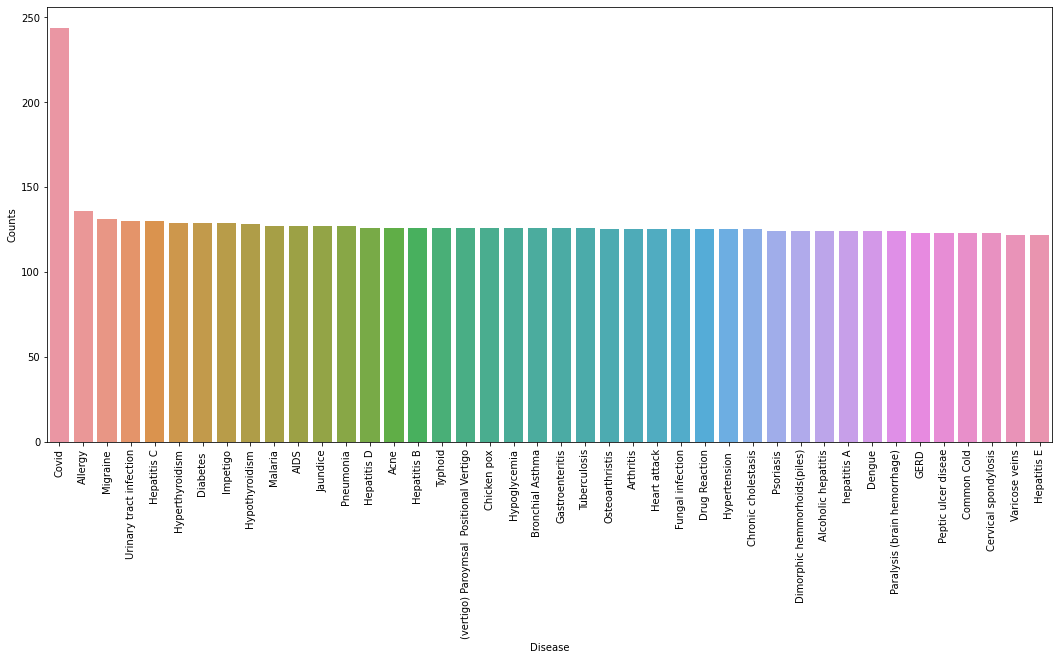

In [ ]:
disease_counts = df["Disease"].value_counts()
print(disease_counts)

temp_df = pd.DataFrame({"Disease": disease_counts.index,"Counts": disease_counts.values})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

Except for the covid data, other diseases have almost the same number of cases.

**Check if there is null or nan value**

In [ ]:
sum(df.isna().sum())

0

In [ ]:
sum(df.isnull().sum())

0

Encode the label.

In [ ]:
encoder = LabelEncoder()
df["Disease"] = encoder.fit_transform(df["Disease"])

We can see that the data is quite clear and since it is a small dataset, it can lead to high accuracy.

**Train and test set split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print("The number of datapoints in training set, test set:\n" + str(len(X_train)) + ", " + str(len(X_test)))

The number of datapoints in training set, test set:
4327, 1082
